In [1]:
import os
import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import curve_fit
from scipy.optimize import minimize

In [2]:
import tables as tb

filename = '/Users/pablo/OneDrive - Universidade de Santiago de Compostela/Máster/TFM/dorothea/dorothea_1_kr83m.h5'

try:
    with tb.open_file(filename, mode='r') as file:
        print("File opened successfully!")
        # Access your data here
except Exception as e:
    print("An error occurred:", e)


File opened successfully!


## Inspeccionar un archivo

Puedes hacerlo con la función `open_file` de `tables`. Para cualquier duda (en general) de cosas que tengas en un notebook, puedes escribir `variable/módulo/etc?` en una celda y salta una ayuda.

Para los archivos individuales que nos interesan aquí, si abres uno cualquiera te encontrarás una estructura con grupos (como "carpetas de cosas") y nodos (tablas)

In [3]:
tb.open_file(filename = '/Users/pablo/OneDrive - Universidade de Santiago de Compostela/Máster/TFM/dorothea/dorothea_1_kr83m.h5', mode = 'r')

File(filename=/Users/pablo/OneDrive - Universidade de Santiago de Compostela/Máster/TFM/dorothea/dorothea_1_kr83m.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=4, complib='zlib', shuffle=True, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/DST (Group) ''
/DST/Events (Table(375,)shuffle, zlib(4)) 'KDST Events'
  description := {
  "event": Int32Col(shape=(), dflt=0, pos=0),
  "time": Float64Col(shape=(), dflt=0.0, pos=1),
  "s1_peak": UInt16Col(shape=(), dflt=0, pos=2),
  "s2_peak": UInt16Col(shape=(), dflt=0, pos=3),
  "nS1": UInt16Col(shape=(), dflt=0, pos=4),
  "nS2": UInt16Col(shape=(), dflt=0, pos=5),
  "S1w": Float64Col(shape=(), dflt=0.0, pos=6),
  "S1h": Float64Col(shape=(), dflt=0.0, pos=7),
  "S1e": Float64Col(shape=(), dflt=0.0, pos=8),
  "S1t": Float64Col(shape=(), dflt=0.0, pos=9),
  "S2w": Float64Col(shape=(), dflt=0.0, pos=10),
  "S2h": Float64Col(shape=(), dflt=0.0, pos=11),
  "S2e": Float64Col(shape=(), dflt=0.0, p

In [4]:
file = tb.open_file('/Users/pablo/OneDrive - Universidade de Santiago de Compostela/Máster/TFM/dorothea/dorothea_1_kr83m.h5', mode = 'r')
file.root

/ (RootGroup) ''
  children := ['DST' (Group), 'Filters' (Group), 'MC' (Group), 'Run' (Group)]

In [5]:
file.root.DST

/DST (Group) ''
  children := ['Events' (Table)]

In [6]:
file.root.DST.Events

/DST/Events (Table(375,)shuffle, zlib(4)) 'KDST Events'
  description := {
  "event": Int32Col(shape=(), dflt=0, pos=0),
  "time": Float64Col(shape=(), dflt=0.0, pos=1),
  "s1_peak": UInt16Col(shape=(), dflt=0, pos=2),
  "s2_peak": UInt16Col(shape=(), dflt=0, pos=3),
  "nS1": UInt16Col(shape=(), dflt=0, pos=4),
  "nS2": UInt16Col(shape=(), dflt=0, pos=5),
  "S1w": Float64Col(shape=(), dflt=0.0, pos=6),
  "S1h": Float64Col(shape=(), dflt=0.0, pos=7),
  "S1e": Float64Col(shape=(), dflt=0.0, pos=8),
  "S1t": Float64Col(shape=(), dflt=0.0, pos=9),
  "S2w": Float64Col(shape=(), dflt=0.0, pos=10),
  "S2h": Float64Col(shape=(), dflt=0.0, pos=11),
  "S2e": Float64Col(shape=(), dflt=0.0, pos=12),
  "S2q": Float64Col(shape=(), dflt=0.0, pos=13),
  "S2t": Float64Col(shape=(), dflt=0.0, pos=14),
  "qmax": Float64Col(shape=(), dflt=0.0, pos=15),
  "Nsipm": UInt16Col(shape=(), dflt=0, pos=16),
  "DT": Float64Col(shape=(), dflt=0.0, pos=17),
  "Z": Float64Col(shape=(), dflt=0.0, pos=18),
  "Zrms": Fl

In [7]:
file.root.DST.Events[:]

array([( 802, 8.02346354e+08, 0, 0, 1, 1, 125.,  3.,  8., 10000., 12.725, 3455., 16113., 378.26086426,  119488.875     , 132.28985596,  8,  109.48888397,   91.97065735, 1.73445703,   70.64466289, -1.75095383e+02, 188.80959087, -1.18730742e+00,   9.54575872,  9.50050448),
       ( 804, 8.04525032e+08, 0, 0, 1, 1, 200.,  5., 18., 10000., 27.325,  544.,  5308., 156.81158447, 1052492.375     ,  42.37681198,  6, 1042.49243164,  875.69360352, 4.30168799,  200.32481524, -4.39996017e+02, 483.45271379, -1.14355378e+00,  10.23982847,  9.52976584),
       ( 806, 8.06310635e+08, 0, 0, 1, 1, 175.,  6., 15., 10000., 26.35 , 1493., 13902., 304.86956787,  773494.9375    ,  69.97101593,  8,  763.49499512,  641.33575439, 3.78179565,   15.73775896,  3.78851992e+02, 379.17872951,  1.52927954e+00,  10.68263098, 10.81096022),
       ( 808, 8.09862545e+08, 0, 0, 1, 1, 125.,  8., 15., 10000., 33.025, 1284., 14703., 327.18838501, 1109492.125     ,  65.27536011,  9, 1099.4921875 ,  923.57336426, 4.55266553,  14

In [8]:
dataframe=pd.DataFrame(file.root.DST.Events[:])

In [9]:
dataframe

,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,S1t,...,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
0,802,8.023464e+08,0,0,1,1,125.0,3.0,8.0,10000.0,...,8,109.488884,91.970657,1.734457,70.644663,-175.095383,188.809591,-1.187307,9.545759,9.500504
1,804,8.045250e+08,0,0,1,1,200.0,5.0,18.0,10000.0,...,6,1042.492432,875.693604,4.301688,200.324815,-439.996017,483.452714,-1.143554,10.239828,9.529766
2,806,8.063106e+08,0,0,1,1,175.0,6.0,15.0,10000.0,...,8,763.494995,641.335754,3.781796,15.737759,378.851992,379.178730,1.529280,10.682631,10.810960
3,808,8.098625e+08,0,0,1,1,125.0,8.0,15.0,10000.0,...,9,1099.492188,923.573364,4.552666,146.898458,-45.016203,153.641191,-0.297359,10.554267,12.770589
4,810,8.114779e+08,0,0,1,1,225.0,8.0,21.0,10000.0,...,8,345.483276,290.205933,2.753760,186.812617,147.084734,237.766425,0.666973,10.056423,9.784297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,1590,1.591512e+09,0,0,1,1,100.0,8.0,17.0,10025.0,...,7,1034.475220,868.959106,4.480284,-42.472266,236.518607,240.301778,1.748475,10.401431,9.794932
371,1592,1.592153e+09,0,0,1,1,175.0,3.0,14.0,10025.0,...,8,548.459534,460.705963,3.222908,-150.548749,434.882661,460.204144,1.904066,9.704244,10.531296
372,1594,1.594884e+09,0,0,1,1,200.0,5.0,16.0,10025.0,...,9,230.454544,193.581802,2.267676,182.002553,-109.643850,212.477535,-0.542205,9.899075,10.842569
373,1596,1.596858e+09,0,0,1,1,225.0,2.0,11.0,10000.0,...,8,290.491241,244.012619,2.385262,-435.675887,24.952962,436.389882,3.084381,9.875792,10.383990


Para abrir varios archivos a la vez, puedes usar lo siguiente:

In [10]:
frames = []

for ifile in range(0, 1001): # Bucle para leer cada archivo individualmente 
    
    file = f'/Users/pablo/OneDrive - Universidade de Santiago de Compostela/Máster/TFM/dorothea/dorothea_{ifile}_kr83m.h5'

    if os.path.exists(file): # En caso de que el path del archivo exista, lo abre como DataFrame 
        
        if ifile%20==0: print(file)
        
        dst = pd.DataFrame(tb.open_file(file).root.DST.Events[:]) 

        frames.append(dst) # Guarda cada uno de los DataFrames en una lista
        
kdst = pd.concat(frames, ignore_index=True) # Hace un nuevo DataFrame juntando los individuales

kdst

/Users/pablo/OneDrive - Universidade de Santiago de Compostela/Máster/TFM/dorothea/dorothea_20_kr83m.h5
/Users/pablo/OneDrive - Universidade de Santiago de Compostela/Máster/TFM/dorothea/dorothea_40_kr83m.h5
/Users/pablo/OneDrive - Universidade de Santiago de Compostela/Máster/TFM/dorothea/dorothea_60_kr83m.h5
/Users/pablo/OneDrive - Universidade de Santiago de Compostela/Máster/TFM/dorothea/dorothea_80_kr83m.h5
/Users/pablo/OneDrive - Universidade de Santiago de Compostela/Máster/TFM/dorothea/dorothea_100_kr83m.h5
/Users/pablo/OneDrive - Universidade de Santiago de Compostela/Máster/TFM/dorothea/dorothea_120_kr83m.h5
/Users/pablo/OneDrive - Universidade de Santiago de Compostela/Máster/TFM/dorothea/dorothea_140_kr83m.h5
/Users/pablo/OneDrive - Universidade de Santiago de Compostela/Máster/TFM/dorothea/dorothea_160_kr83m.h5
/Users/pablo/OneDrive - Universidade de Santiago de Compostela/Máster/TFM/dorothea/dorothea_180_kr83m.h5
/Users/pablo/OneDrive - Universidade de Santiago de Compost

,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,S1t,...,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
0,802,8.023464e+08,0,0,1,1,125.0,3.0,8.0,10000.0,...,8,109.488884,91.970657,1.734457,70.644663,-175.095383,188.809591,-1.187307,9.545759,9.500504
1,804,8.045250e+08,0,0,1,1,200.0,5.0,18.0,10000.0,...,6,1042.492432,875.693604,4.301688,200.324815,-439.996017,483.452714,-1.143554,10.239828,9.529766
2,806,8.063106e+08,0,0,1,1,175.0,6.0,15.0,10000.0,...,8,763.494995,641.335754,3.781796,15.737759,378.851992,379.178730,1.529280,10.682631,10.810960
3,808,8.098625e+08,0,0,1,1,125.0,8.0,15.0,10000.0,...,9,1099.492188,923.573364,4.552666,146.898458,-45.016203,153.641191,-0.297359,10.554267,12.770589
4,810,8.114779e+08,0,0,1,1,225.0,8.0,21.0,10000.0,...,8,345.483276,290.205933,2.753760,186.812617,147.084734,237.766425,0.666973,10.056423,9.784297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372537,800790,8.007904e+11,0,0,1,1,275.0,6.0,24.0,10000.0,...,6,823.490662,691.732117,3.832676,160.945788,357.977059,392.493466,1.148277,11.534620,7.768118
372538,800792,8.007932e+11,0,0,1,1,200.0,5.0,16.0,10000.0,...,8,457.494995,384.295776,2.973734,-315.980662,5.474937,316.028090,3.124268,9.974448,10.655356
372539,800794,8.007957e+11,0,0,1,1,175.0,2.0,11.0,10000.0,...,9,670.485168,563.207520,3.433600,70.582558,-352.601541,359.596641,-1.373231,10.967244,10.689292
372540,800796,8.007963e+11,0,0,1,1,150.0,2.0,8.0,10025.0,...,6,115.459251,96.985764,1.711969,-291.917332,-263.648163,393.352364,-2.407034,10.071907,7.743258


Puedes ver las columnas que hay haciendo `kdst.columns`

In [11]:
kdst.columns

Index(['event', 'time', 's1_peak', 's2_peak', 'nS1', 'nS2', 'S1w', 'S1h',
       'S1e', 'S1t', 'S2w', 'S2h', 'S2e', 'S2q', 'S2t', 'qmax', 'Nsipm', 'DT',
       'Z', 'Zrms', 'X', 'Y', 'R', 'Phi', 'Xrms', 'Yrms'],
      dtype='object')

Y seleccionar las que quieras para visualizar esas en concreto. Por ejemplo, para ver las magnitudes relacionadas con el S1 y el S2: 

In [12]:
df=kdst[['s1_peak', 's2_peak', 'nS1', 'nS2', 'S1w', 'S1h', 'S1e', 'S1t', 'S2w', 'S2h', 'S2e', 'S2q', 'S2t','X','Y','Z','DT','R']]

df

,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,S1t,S2w,S2h,S2e,S2q,S2t,X,Y,Z,DT,R
0,0,0,1,1,125.0,3.0,8.0,10000.0,12.725,3455.0,16113.0,378.260864,1.194889e+05,70.644663,-175.095383,91.970657,109.488884,188.809591
1,0,0,1,1,200.0,5.0,18.0,10000.0,27.325,544.0,5308.0,156.811584,1.052492e+06,200.324815,-439.996017,875.693604,1042.492432,483.452714
2,0,0,1,1,175.0,6.0,15.0,10000.0,26.350,1493.0,13902.0,304.869568,7.734949e+05,15.737759,378.851992,641.335754,763.494995,379.178730
3,0,0,1,1,125.0,8.0,15.0,10000.0,33.025,1284.0,14703.0,327.188385,1.109492e+06,146.898458,-45.016203,923.573364,1099.492188,153.641191
4,0,0,1,1,225.0,8.0,21.0,10000.0,20.875,2260.0,15828.0,373.101440,3.554832e+05,186.812617,147.084734,290.205933,345.483276,237.766425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372537,0,0,1,1,275.0,6.0,24.0,10000.0,27.850,1400.0,13747.0,260.463776,8.334906e+05,160.945788,357.977059,691.732117,823.490662,392.493466
372538,0,0,1,1,200.0,5.0,16.0,10000.0,24.950,2031.0,14806.0,320.985535,4.674950e+05,-315.980662,5.474937,384.295776,457.494995,316.028090
372539,0,0,1,1,175.0,2.0,11.0,10000.0,23.900,1563.0,14361.0,362.028992,6.804851e+05,70.582558,-352.601541,563.207520,670.485168,359.596641
372540,0,0,1,1,150.0,2.0,8.0,10025.0,12.625,3197.0,14734.0,345.507233,1.254842e+05,-291.917332,-263.648163,96.985764,115.459251,393.352364


In [13]:
pd.set_option('display.max_columns', None) # Con esto se muestran todas las columnas

kdst

,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,S1t,S2w,S2h,S2e,S2q,S2t,qmax,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
0,802,8.023464e+08,0,0,1,1,125.0,3.0,8.0,10000.0,12.725,3455.0,16113.0,378.260864,1.194889e+05,132.289856,8,109.488884,91.970657,1.734457,70.644663,-175.095383,188.809591,-1.187307,9.545759,9.500504
1,804,8.045250e+08,0,0,1,1,200.0,5.0,18.0,10000.0,27.325,544.0,5308.0,156.811584,1.052492e+06,42.376812,6,1042.492432,875.693604,4.301688,200.324815,-439.996017,483.452714,-1.143554,10.239828,9.529766
2,806,8.063106e+08,0,0,1,1,175.0,6.0,15.0,10000.0,26.350,1493.0,13902.0,304.869568,7.734949e+05,69.971016,8,763.494995,641.335754,3.781796,15.737759,378.851992,379.178730,1.529280,10.682631,10.810960
3,808,8.098625e+08,0,0,1,1,125.0,8.0,15.0,10000.0,33.025,1284.0,14703.0,327.188385,1.109492e+06,65.275360,9,1099.492188,923.573364,4.552666,146.898458,-45.016203,153.641191,-0.297359,10.554267,12.770589
4,810,8.114779e+08,0,0,1,1,225.0,8.0,21.0,10000.0,20.875,2260.0,15828.0,373.101440,3.554832e+05,97.507248,8,345.483276,290.205933,2.753760,186.812617,147.084734,237.766425,0.666973,10.056423,9.784297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372537,800790,8.007904e+11,0,0,1,1,275.0,6.0,24.0,10000.0,27.850,1400.0,13747.0,260.463776,8.334906e+05,57.623192,6,823.490662,691.732117,3.832676,160.945788,357.977059,392.493466,1.148277,11.534620,7.768118
372538,800792,8.007932e+11,0,0,1,1,200.0,5.0,16.0,10000.0,24.950,2031.0,14806.0,320.985535,4.674950e+05,94.144928,8,457.494995,384.295776,2.973734,-315.980662,5.474937,316.028090,3.124268,9.974448,10.655356
372539,800794,8.007957e+11,0,0,1,1,175.0,2.0,11.0,10000.0,23.900,1563.0,14361.0,362.028992,6.804851e+05,91.884056,9,670.485168,563.207520,3.433600,70.582558,-352.601541,359.596641,-1.373231,10.967244,10.689292
372540,800796,8.007963e+11,0,0,1,1,150.0,2.0,8.0,10025.0,12.625,3197.0,14734.0,345.507233,1.254842e+05,93.739136,6,115.459251,96.985764,1.711969,-291.917332,-263.648163,393.352364,-2.407034,10.071907,7.743258


Como numpy está integrado en pandas, puedes trabajar con el dataframe como lo harías con arrays de numpy, y puedes ver, por ejemplo, los valores medios de las variables que se representan en cada columna:

In [14]:
kdst.mean()

event      4.008774e+05
time       4.008784e+11
s1_peak    1.497818e-03
s2_peak    4.563244e-05
nS1        1.002996e+00
nS2        1.000091e+00
S1w        1.736014e+02
S1h        5.263731e+00
S1e        1.563445e+01
S1t        1.001146e+04
S2w        2.503648e+01
S2h        1.774394e+03
S2e        1.396003e+04
S2q        3.135584e+02
S2t        7.301661e+05
qmax       8.356942e+01
Nsipm      7.680033e+00
DT         7.201547e+02
Z          6.049299e+02
Zrms       3.513522e+00
X         -5.727332e-02
Y         -2.066773e-01
R          3.223868e+02
Phi       -2.633319e-03
Xrms       1.146353e+01
Yrms       1.147994e+01
dtype: float64

Algunos no tiene sentido estudiarlos, como por ejemplo el valor medio de `event` ya que simplemente es una etiqueta para identificar cada evento. 

Puedes también hacer histogramas directamente para ver las distribuciones: 

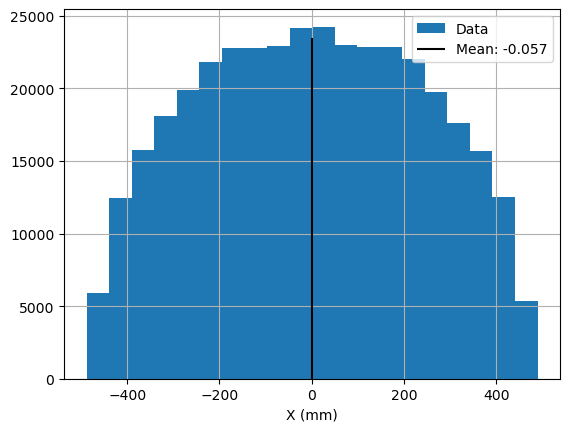

In [15]:
kdst['X'].hist(bins=20, label = 'Data')
plt.vlines(kdst['X'].mean(), 0, 23500, color = 'k', label = f'Mean: {kdst.X.mean():.3f}')
plt.xlabel('X (mm)')
plt.legend()

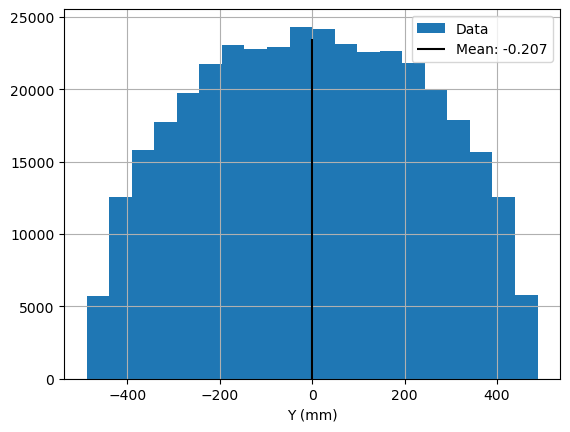

In [16]:
kdst['Y'].hist(bins=20, label = 'Data')
plt.vlines(kdst['Y'].mean(), 0, 23500, color = 'k', label = f'Mean: {kdst.Y.mean():.3f}')
plt.xlabel('Y (mm)')
plt.legend()

Text(0.5, 0, 'S2e (pes)')

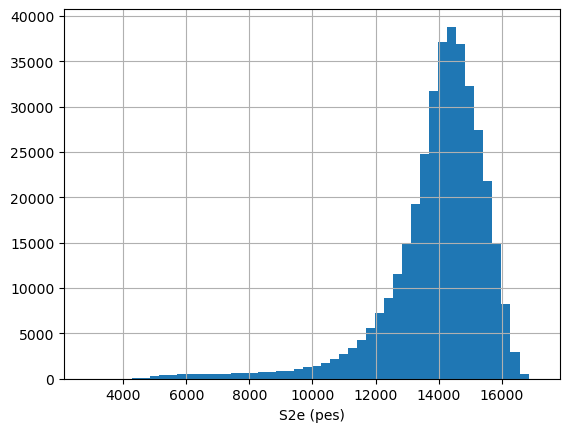

In [17]:
kdst['S2e'].hist(bins=50)
plt.xlabel('S2e (pes)')

Text(0.5, 0, 'S1t')

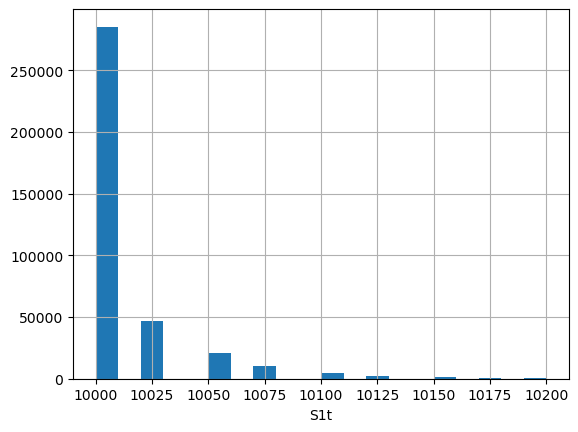

In [18]:
kdst['S1t'].hist(bins = 20, range = [10000, 10200])
plt.xlabel('S1t')

En el caso del S1, por cómo han sido simulados los eventos, casi todos están prácticamente en el mismo punto, por la propia configuración del Monte Carlo. Esto imita el "trigger", que se registra desde unos momentos antes de que se detecte la señal del S1. Sin embargo, para el caso del S2, esta señal tardará más o menos en llegar en función de dónde ocurra el evento. Como la velocidad de deriva es constante, y está dada por el campo aplicado en la TPC, verás que hay una correspondencia total entre la distribución de `S2t` y `Z` o `DT`. 

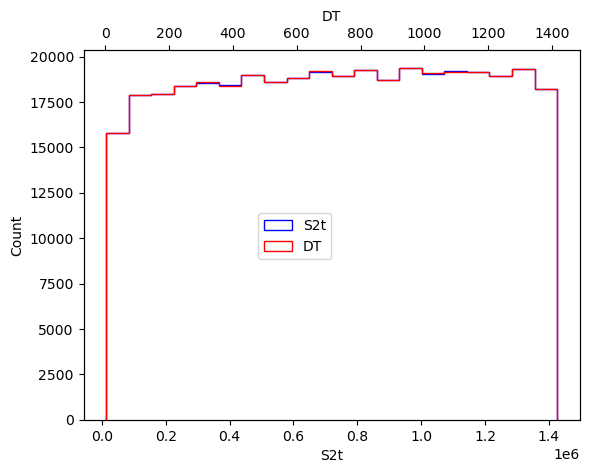

In [19]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# Histograma de S2t

ax1.hist(kdst['S2t'], bins=20, histtype='step', color='b', label = 'S2t')
ax1.set_xlabel('S2t')
ax1.set_ylabel('Count')

# Hacemos una copia de ax1 manteniendo el eje Y pero haciendo un nuevo eje X
ax2 = ax1.twiny()

# Histograma de DT
ax2.hist(kdst['DT'], bins=20, histtype='step', color='r', label = 'DT');
ax2.set_xlabel('DT')
fig.legend(loc='center')

(No se ven por separado porque están casi perfectamente solapadas)

Puedes ver la distribución de los eventos en el plano XY con un histograma en 2 dimensiones: 

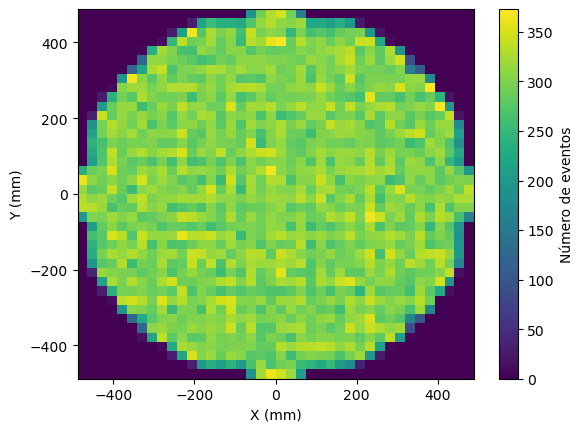

In [20]:
plt.hist2d(kdst['X'], kdst['Y'], bins=[40, 40]);
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
cbar = plt.colorbar()
cbar.set_label('Número de eventos')

## Variación de la energía con la distancia

Ahora hago ajustes de la energía que se mide a diferentes distancias del plano de energía

In [21]:
def atenuacion_exponencial(x,mu,E0):
    return E0*np.exp(-x/mu)


In [22]:
energía=kdst['S2e']
altura=kdst['DT']

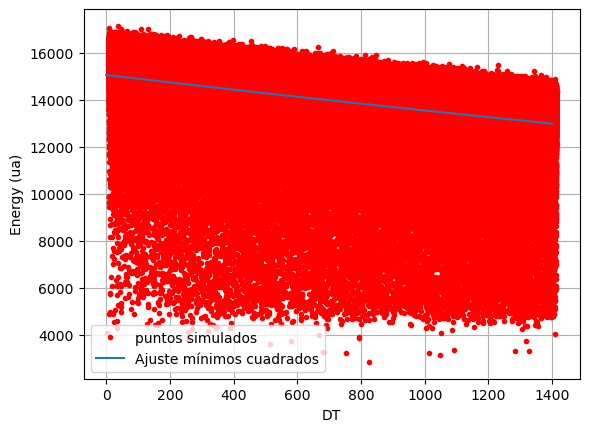

Los parámetros del ajuste son tau= 9455.89849472 +- 39.78842350 y E0= 15051.10 +- 5.33


In [23]:
popt,pcov=curve_fit(atenuacion_exponencial,altura,energía,p0=[1900,1600])
plt.plot(altura,energía,'r.',label='puntos simulados')
plt.plot(np.linspace(.1,1400,1000),atenuacion_exponencial(np.linspace(.1,1400,1000),*popt),label='Ajuste mínimos cuadrados')
plt.legend(loc='best')
plt.xlabel('DT')
plt.ylabel('Energy (ua)')
plt.grid(True)
plt.savefig('Ajuste prueba')
plt.show()
print('Los parámetros del ajuste son tau= %.8f +- %.8f y E0= %.2f +- %.2f' % (popt[0],np.sqrt(pcov[0][0]),popt[1],np.sqrt(pcov[1][1])))

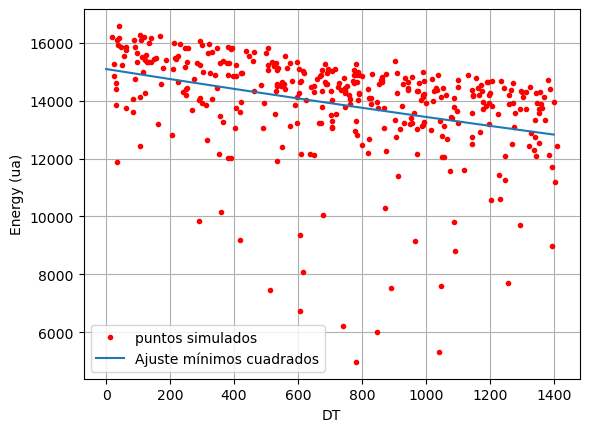

Los parámetros del ajuste son tau= 8609.43985422 +- 1171.66431047 y E0= 15097.86 +- 188.57


In [24]:
popt,pcov=curve_fit(atenuacion_exponencial,dataframe['DT'],dataframe['S2e'],p0=[1900,1600])
plt.plot(dataframe['DT'],dataframe['S2e'],'r.',label='puntos simulados')
plt.plot(np.linspace(0.001,1400,1000),atenuacion_exponencial(np.linspace(0.0001,1400,1000),*popt),label='Ajuste mínimos cuadrados')
plt.legend(loc='best')
plt.xlabel('DT')
plt.ylabel('Energy (ua)')
plt.grid(True)
plt.savefig('Ajuste prueba')
plt.show()
print('Los parámetros del ajuste son tau= %.8f +- %.8f y E0= %.2f +- %.2f' % (popt[0],np.sqrt(pcov[0][0]),popt[1],np.sqrt(pcov[1][1])))

## Correcciones por el radio de la cámara

Como la vida del electrón además de depender de la distancia al plano de detección también dependerán del punto axial en el que estamos midiendo voy a hacer un filtro para ver el decaimiennto de los electrones en un "cilindro" centrado en el punto x=0 y y=0

In [25]:
energías_eventos_centrales=[]
posicion_axial=[]

energías_eventos_externos=[]
posicion_externa=[]

for i in range(len(kdst['S2e'])):
    if kdst['R'][i]<=np.sqrt(2*50**2):
        energías_eventos_centrales.append(kdst['S2e'][i])
        posicion_axial.append(kdst['DT'][i])
    else:
        energías_eventos_externos.append(kdst['S2e'][i])
        posicion_externa.append(kdst['DT'][i])
        
print('El porcentaje de eventos en un radio menor de 71mm es',np.round(len(posicion_axial)/len(kdst['DT'])*100,3),'%')
print('El porcentaje de eventos en un radio mayor de 71mm es',np.round(len(posicion_externa)/len(kdst['DT'])*100,3),'%')

popt,pcov=curve_fit(atenuacion_exponencial,posicion_axial,energías_eventos_centrales,p0=[1900,1625])
popt1,pcov1=curve_fit(atenuacion_exponencial,posicion_externa,energías_eventos_externos,p0=[1900,1500])

print('Los parámetros del ajuste para los eventos centrales son tau= %.8f +- %.8f y E0= %.2f +- %.2f' % (popt[0],np.sqrt(pcov[0][0]),popt[1],np.sqrt(pcov[1][1])))
print('Los parámetros del ajuste para los eventos externos son tau= %.8f +- %.8f y E0= %.2f +- %.2f' % (popt1[0],np.sqrt(pcov1[0][0]),popt1[1],np.sqrt(pcov1[1][1])))

El porcentaje de eventos en un radio menor de 71mm es 2.169 %
El porcentaje de eventos en un radio mayor de 71mm es 97.831 %
Los parámetros del ajuste para los eventos centrales son tau= 9963.39892677 +- 39.51791288 y E0= 16450.02 +- 5.23
Los parámetros del ajuste para los eventos externos son tau= 9442.75067874 +- 40.28012690 y E0= 15020.25 +- 5.39


In [34]:
len(posicion_axial)

8082

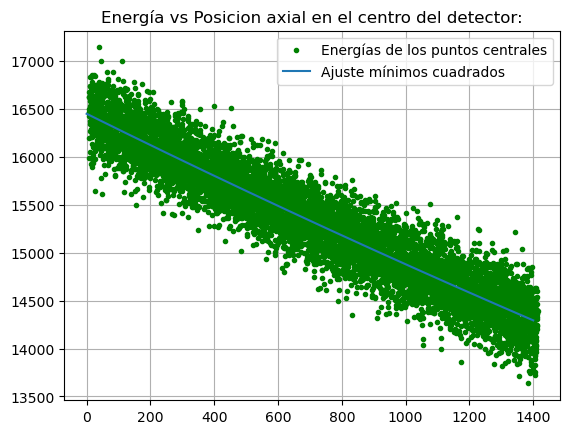

In [26]:
plt.plot(posicion_axial, energías_eventos_centrales,'.',color='green',label='Energías de los puntos centrales')
plt.plot(np.linspace(0.0001,1400,1000),atenuacion_exponencial(np.linspace(0.0001,1400,1000),*popt),label='Ajuste mínimos cuadrados')
plt.title('Energía vs Posicion axial en el centro del detector:')
plt.grid(True)
plt.legend(loc='best')
plt.show()

Veamos esto en un mapa de calor

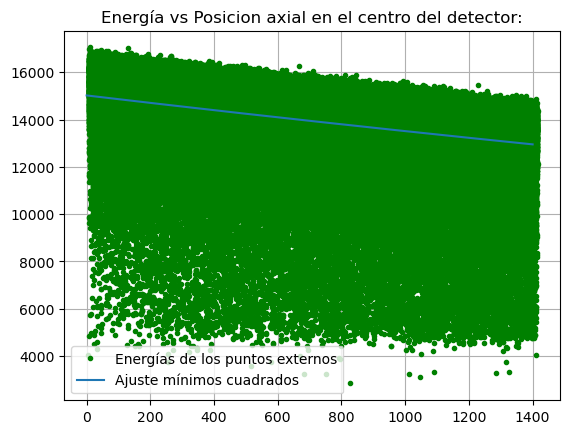

In [27]:
plt.plot(posicion_externa, energías_eventos_externos,'.',color='green',label='Energías de los puntos externos')
plt.plot(np.linspace(0.0001,1400,1000),atenuacion_exponencial(np.linspace(0.0001,1400,1000),*popt1),label='Ajuste mínimos cuadrados')
plt.title('Energía vs Posicion axial en el centro del detector:')
plt.grid(True)
plt.legend(loc='best')
plt.show()

## Distribución radial de la energía

Cuando me quedo solo con el cilindro central, es decir me quedo solo con los eventos dentro de un radio centrado veo que elimino una gran cantidad de eventos de una energía muy baja, voy a hacer un corte de 30 (no se en que unidades estan los datos de cada columna) centrado en DT=700 para ver como se distribuye radialmente la energía desde un corte estrecho (Trato de reducir ruido de eventos muy cercanos que llegan con toda la energía practicamente sin llegar hasta el punto mas lejano donde hay mucha perdida por estar muy lejos del plano de energía).

In [28]:
energías_eventos_corte=[]
DT_corte=[]
X_corte=[]
Y_corte=[]


for i in range(len(kdst['S2e'])):
    if 715>kdst['DT'][i] and 685<kdst['DT'][i]:
        energías_eventos_corte.append(kdst['S2e'][i])
        X_corte.append(kdst['X'][i])
        Y_corte.append(kdst['Y'][i])
        DT_corte.append(kdst['DT'][i])
        
print('El porcentaje de eventos dentro de este corte es',np.round(len(energías_eventos_corte)/len(kdst['S2e'])*100,3),'%')

El porcentaje de eventos dentro de este corte es 2.189 %


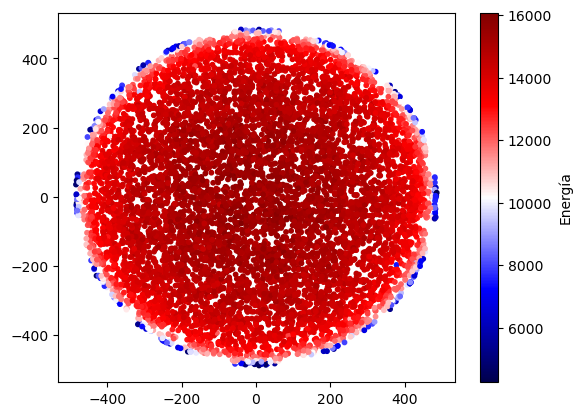

In [29]:
plt.scatter(X_corte, Y_corte,c=energías_eventos_corte ,cmap='seismic', s=10)
plt.colorbar(label='Energía')
plt.show()

Vemos que sí es verdad que dentro de este corte tenemos una zona de radios más altos donde medimos una energía bastante menor que la energía que tenemos en las zonas centrales y puede apreciarse que la energía crece cuanto más nos acercamos al centro del corte, el punto (0,0)

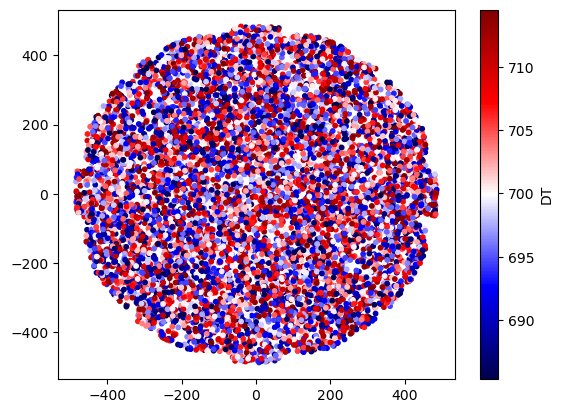

In [30]:
plt.scatter(X_corte, Y_corte,c=DT_corte ,cmap='seismic', s=10)
plt.colorbar(label='DT')
plt.show()

El DT vemos que se reparte uniformemente es decir, no depende de del punto del plano en que me encuentro. Dicho esto quiero ver como se relacionan los datos entre sí así que voy a representar la matriz de correlación.

<Axes: >

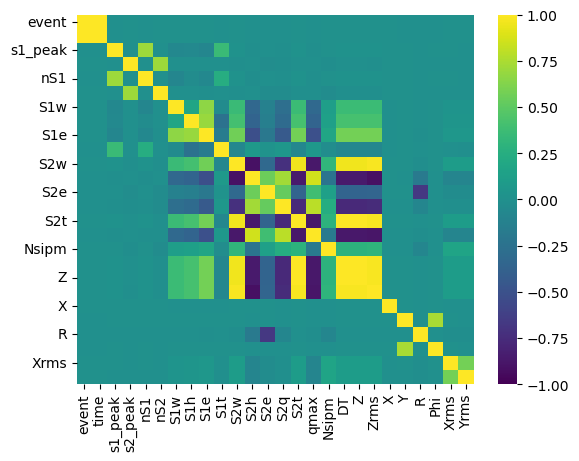

In [36]:
sns.heatmap(kdst.corr(numeric_only=True),vmin=-1,vmax=1,cmap='viridis')

y podemos quedarnos con los datos realmente correlacionados e interesantes en este caso: 

<Axes: >

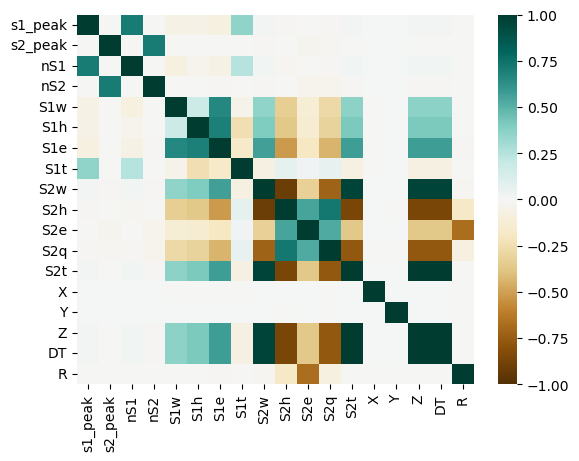

In [32]:
sns.heatmap(df.corr(numeric_only=True),vmin=-1,vmax=1,cmap='BrBG')

In [33]:
#s2w DT profile s2h s2q s1e,w,h todos con DT;s2w s2h; s2w s2e y igual para s1 seprarar ajustes de e con Dt en 100

Donde, evidentemente la mayor correlación está entre Z y DT, vemos la correlación entre el radio, R, y la energía de la señal y la dependencia de la energía con Z.